In [1]:
import numpy as np
from obspy import read
from obspy.io.xseed import Parser
from scipy import signal
import obspy
import matplotlib.pyplot as plt
from IPython.display import Image

## Loading Data and decimate it to 25Hz by factor 2

In [2]:
## Depends on workstation 
## day 337 in 2016 is  December 2, 2016 (Fri)
#st = read('../TEST_DATA/DATA/KNR01/BHZ.D/1B.KNR01..BHZ.D.2016.337')
st = read('/data/cen/u254/Essing/AWI/KNIPA_NEW/2016/1B/KNR01/BHZ.D/1B.KNR01..BHZ.D.2016.337')
#parser01 = Parser('../TEST_DATA/Resp/RESP.1B.KNR01..BHZ')
parser01 = Parser('/data/cen/u254/Essing/AWI/CAL/RESP.1B.KNR01..BHZ')
st = st.decimate(factor=2)
st_simu = st.copy()
st_simu.simulate(seedresp={'filename': parser01, 'units': "ACC"})
st_simu_filt = st_simu.copy()
st_simu_filt = st_simu_filt.filter('bandpass',freqmin=1, freqmax=6.9)

fs = int(st_simu[0].stats.sampling_rate)

/home/zmaw/u300967/.conda/envs/vgseis_2018/lib/python3.6/site-packages/obspy/signal/detrend.py:31: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(data.dtype, float):


# Filtercorner testing

In [ ]:
st_filt = st.copy()
st_filt = st_filt.filter('bandpass',freqmin=1, freqmax=8)
st_array = np.asarray(st[0].data)
st_filt_array = np.asarray(st_filt[0].data)

fs = int(st_filt[0].stats.sampling_rate)

t_start = fs*20000
t1_start = t_start+fs*8000
st_nofilt_10_min = st_array[t_start:t_start+10*fs*60]
st_filt_10_min = st_filt_array[t_start:t_start+10*fs*60]
#test1_10_min = st_array[t1_start:t1_start+10*fs*60]

In [ ]:
f, Pxx = signal.periodogram(st_nofilt_10_min, fs=fs)
f1,Pxx1 = signal.periodogram(st_filt_10_min, fs=fs)

In [ ]:
#plt.semilogy(f, Pxx)
plt.subplot(121)
plt.plot(f, Pxx,label='nofilt')
#plt.xlim(0,5)
#plt.ylim(1e-4,1e6)
plt.grid()

plt.subplot(122)
plt.plot(f1, Pxx1,label='filt')
#plt.xlim(0,1)
#plt.ylim(1e-4,1e6)
plt.grid()

plt.show()

# Remove response

In [ ]:
parser01 = Parser('../TEST_DATA/Resp/RESP.1B.KNR01..BHZ')
st_simu = st.copy()
st_simu.simulate(seedresp={'filename': parser01, 'units': "ACC"})

In [ ]:
st_simu_filt = st_simu.copy()
st_simu_array = np.array(st_simu[0].data)

st_simu_filt = st_simu_filt.filter('highpass',freq=1)
st_simu_filt_array = np.array(st_simu_filt[0].data)

In [ ]:
plt.plot(st_simu_filt_array)
#plt.xlim(318800,319500)
plt.show()

In [ ]:
t_start = fs*20000
t1_start = t_start+fs*30000

st_simu_nofilt_10_min = st_simu_array[t_start:t_start+10*fs*60]
st_simu_filt_10_min = st_simu_filt_array[t_start:t_start+10*fs*60]

In [ ]:
f2, Pxx2 = signal.periodogram(st_simu_nofilt_10_min, fs=fs)
f3, Pxx3 = signal.periodogram(st_simu_filt_10_min, fs=fs)

In [ ]:
plt.figure(figsize=(11,11))
#plt.semilogy(f, Pxx)
plt.subplot(221)
plt.plot(f, Pxx,label='nofilt')
#plt.xlim(0,5)
#plt.ylim(1e-4,1e6)
plt.legend()
plt.grid()

plt.subplot(222)
plt.plot(f1, Pxx1,label='filt')
#plt.xlim(0,1)
#plt.ylim(1e-4,1e6)
plt.legend()
plt.grid()

#plt.semilogy(f, Pxx)
plt.subplot(223)
plt.plot(f2, Pxx2, label='st_simu_nofilt')
#plt.xlim(0,1)
#plt.ylim(1e-4,1e6)
plt.legend()
plt.grid()

plt.subplot(224)
plt.plot(f3, Pxx3, label='st_simu_filt')
#plt.xlim(0,1)
#plt.ylim(1e-4,1e6)
plt.legend()
plt.grid()

plt.show()

# Signal vs. no signal

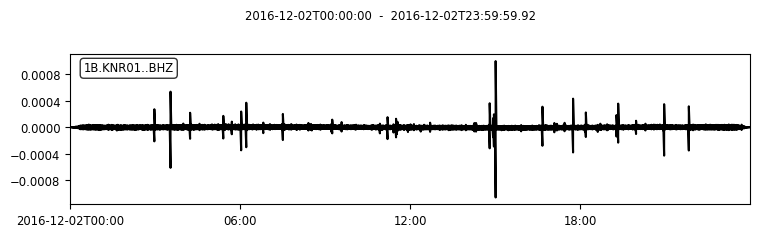

In [39]:
st_simu.plot()

In [48]:
#t_signal_start = 20000*fs
#t_nosignal_start = 28000*fs
#win_len = 4*60*fs

st_simu_array = np.array(st_simu_filt[0].data)

In [51]:
st_simu_array1 = np.append(st_simu_array, 0)

In [41]:
st_simu_signal_1_min = st_simu_array[t_signal_start:t_signal_start+win_len]
f_sig, Pxx_sig = signal.periodogram(st_simu_signal_1_min, fs=fs)

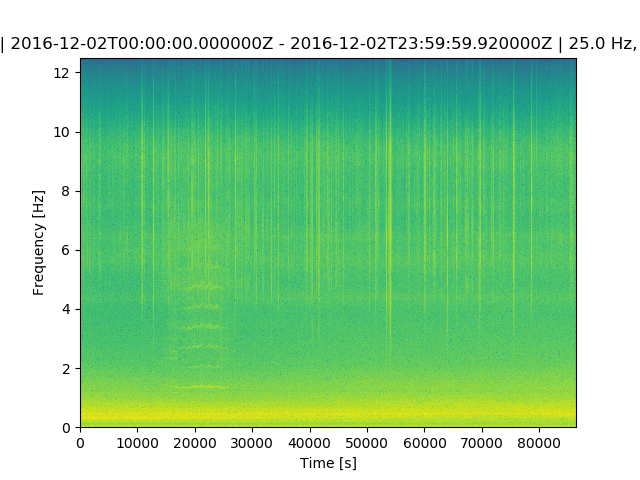

In [42]:
Image('KNR01.BHZ_2016-12-02T00:00:00.000000Z.png')

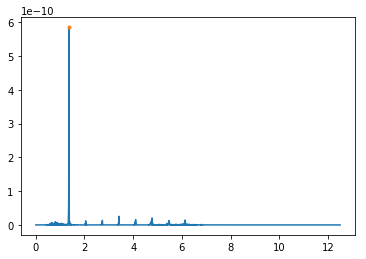

In [43]:
plt.plot(f_sig, Pxx_sig)
plt.plot(f_sig[np.argmax(Pxx_sig)], np.max(Pxx_sig), '.')
#plt.plot(f_sig[np.argmax(Pxx_sig[::1])], np.max(Pxx_sig[::1]), 'o')
plt.show()

In [44]:
def search_maxima_in_periodogram(maxima, data, fs=fs, wlen):
    
    '''Function to cut daily data into several windows and searche for maxima in each window
    Input:
    
    maxima    float        number of maxima to search for
    signal    array        array with data
    fs        float        value of sampling rate
    wlen      int          value of window length in seconds
    
    '''

    
    
    
    
    f_sig, Pxx_sig = signal.periodogram(data, fs=fs)
    index_max = np.zeros(maxima)
    value_max_f = np.zeros(maxima)
    value_max = np.zeros(maxima)
    Pxx_sig1 = Pxx_sig.copy()
    
    #wlen = wlen * fs
    #st_simu_signal_1_min = st_simu_array[t_signal_start:t_signal_start+win_len]
    #for wlen in data:
        #data_cut = st_simu_array[t_signal_start:t_signal_start+win_len]
        #print(data_cut)
    for i in range(maxima):

        # first maxima


        index_max[i] = np.argmax(Pxx_sig1)
        value_max_f[i] = f_sig[np.argmax(Pxx_sig1)]
        value_max[i] = np.max(Pxx_sig1)

        minval = np.min(Pxx_sig1)
        Pxx_sig1[int(index_max[i]-10):int(index_max[i]+10)] = minval-100
    #fname = '../Plots/PSD/KNR01..BHZ.D.2016.337' + str(t_signal_start) + '-' + str(t_signal_start+ win_len)
    #plt.semilogy(f_sig, Pxx_sig)
    #plt.semilogy(value_max_f, value_max, 'o')
    #plt.plot(value_ond_max_f, value_second_max, 'o')
    #plt.plot(value_third_max_f, value_third_max, 'o')
    #plt.plot(value_fourth_max_f, value_fourth_max, 'o')
    #plt.plot(f_sig[np.argmax(Pxx_sig[::1])], np.max(Pxx_sig[::1]), 'o')
    #plt.savefig(fname=fname)
    return(value_max_f, value_max)

In [46]:
maxima = 8
data= st_simu_signal_1_min

value_max_f, value_max = search_maxima_in_periodogram(maxima, data, fs=fs)

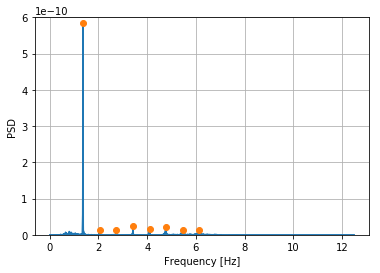

In [47]:
plt.plot(f_sig, Pxx_sig)
plt.plot(value_max_f, value_max, 'o')
plt.ylim(0*1e-10,6*1e-10)
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD')
#plt.xlim(1.2,2)
plt.grid()
#plt.plot(value_ond_max_f, value_second_max, 'o')
#plt.plot(value_third_max_f, value_third_max, 'o')
#plt.plot(value_fourth_max_f, value_fourth_max, 'o')
#plt.plot(f_sig[np.argmax(Pxx_sig[::1])], np.max(Pxx_sig[::1]), 'o')
plt.show()



# next steps...
# 1) while schleife mit abbruchkriterium nach 4-6 Durchlaeufen
# 2) als definition schreiben
# 3) 

# mlab.specgram

In [78]:
from matplotlib import mlab
plt.rcParams['image.cmap'] = 'terrain'
import math as M

In [79]:
def searchmaxima(maxima, data):

    index_max = np.zeros(maxima)
    value_max_f = np.zeros(maxima)
    value_max = np.zeros(maxima)
    data1 = data.copy()

    for i in range(maxima):

        # first maxima

        index_max[i] = np.argmax((data1))
        value_max[i] = np.max((data1))
        #index_max[i] = np.argmax(Pxx_sig1)
        #value_max_f[i] = f_sig[np.argmax(Pxx_sig1)]
        #value_max[i] = np.max(Pxx_sig1)

        minimal_value = np.min(data1)
        
        data1[int(index_max[i]-2):int(index_max[i]+2)] = minimal_value-100
    #fname = '../Plots/PSD/KNR01..BHZ.D.2016.337' + str(t_signal_start) + '-' + str(t_signal_start+ win_len)
    #plt.semilogy(f_sig, Pxx_sig)
    #plt.semilogy(value_max_f, value_max, 'o')
    #plt.plot(value_ond_max_f, value_second_max, 'o')
    #plt.plot(value_third_max_f, value_third_max, 'o')
    #plt.plot(value_fourth_max_f, value_fourth_max, 'o')
    #plt.plot(f_sig[np.argmax(Pxx_sig[::1])], np.max(Pxx_sig[::1]), 'o')
    #plt.savefig(fname=fname)
    return(value_max, index_max)

In [80]:
def _nearest_pow_2(x):
    """
    Find power of two nearest to x
    >>> _nearest_pow_2(3)
    2.0
    >>> _nearest_pow_2(15)
    16.0
    :type x: float
    :param x: Number
    :rtype: Int
    :return: Nearest power of 2 to x
    """
    a = M.pow(2, M.ceil(np.log2(x)))
    b = M.pow(2, M.floor(np.log2(x)))
    if abs(a - x) < abs(b - x):
        return a
    else:
        return b

In [81]:
data = np.array(st_simu_filt[0].data)
data = data - data.mean()
per_lap = .1
wlen = float(fs*10)
npts = len(data)
nfft = int(_nearest_pow_2(wlen * fs))
print(npts, nfft, wlen)
nlap = int(nfft * float(per_lap))

2159999 8192 250.0


In [85]:
specgram, freq, time = mlab.specgram(data, Fs=fs, NFFT=nfft, noverlap=0)

In [91]:
specgram = 10 * np.log10(specgram[1:,:])

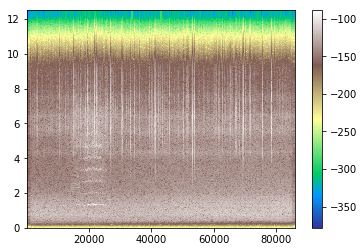

In [86]:
plt.pcolormesh(time, freq, 10 * np.log10(specgram[1:,:]))
plt.colorbar()
plt.show()

In [55]:
value_max, index_max = searchmaxima(maxima=5, data=np.flip(specgram[1000], axis=0))

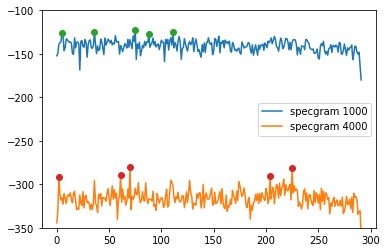

In [60]:
plt.plot(np.flip(specgram[1000], axis=0), label='specgram 1000')
plt.plot(np.flip(specgram[4000], axis=0), label='specgram 4000')
plt.plot(index_max, value_max, 'o')
plt.plot(index_max1, value_max1, 'o')
plt.legend()
plt.ylim(-350,-100)
plt.plot()
plt.show()

In [87]:
value_max1, index_max1 = searchmaxima(maxima=5, data=np.flip(specgram[4000], axis=0))

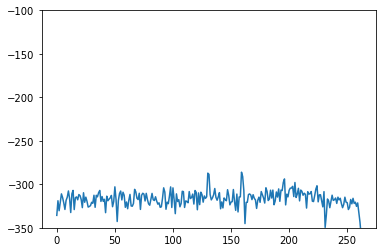

In [92]:
plt.plot(np.flip(specgram[4000], axis=0))
plt.plot(index_max1, value_max1, 'o')
plt.ylim(-350,-100)
plt.plot()
plt.show()

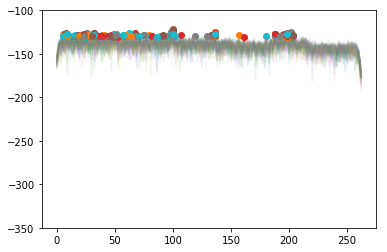

In [93]:
for i in range(1000,1050):
    value_max1, index_max1 = searchmaxima(maxima=5, data=np.flip(specgram[i], axis=0))
    plt.plot(np.flip(specgram[i], axis=0), alpha=.1)
    plt.plot(index_max1, value_max1, 'o')
    plt.ylim(-350,-100)
plt.show()

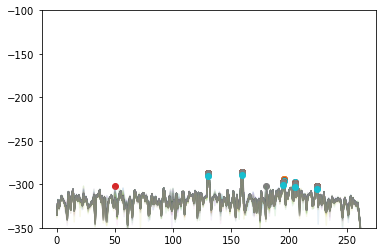

In [109]:
for i in range(np.shape(specgram)[0]):
    value_max1, index_max1 = searchmaxima(maxima=5, data=np.flip(specgram[i], axis=0))
    plt.plot(np.flip(specgram[i], axis=0), alpha=.1)
    plt.plot(index_max1, value_max1, 'o')
    plt.ylim(-350,-100)
    if i%100 == 0:
        plt.savefig('../../Plots/test1/'+ str(i))
        plt.clf()
#plt.show()

In [ ]:
plt.plot(specgram[948])
plt.plot((value_max_f), (value_max), 'o')
#plt.ylim(0*1e-10,6*1e-10)
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD')
#plt.xlim(1.2,2)
plt.grid()
#plt.plot(value_ond_max_f, value_second_max, 'o')
#plt.plot(value_third_max_f, value_third_max, 'o')
#plt.plot(value_fourth_max_f, value_fourth_max, 'o')
#plt.plot(f_sig[np.argmax(Pxx_sig[::1])], np.max(Pxx_sig[::1]), 'o')
plt.show()



In [104]:
200%100

0

In [36]:
test = np.linspace(20,30,11)

In [38]:
print(test.mean())

25.0


In [17]:
24*3600

86400